In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Next Word Prediction and Text Generation

In [ ]:
import nltk
nltk.download('gutenberg')  # Make sure the Gutenberg corpus is downloaded
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
# Load "Moby Dick" text
mmd = gutenberg.raw('melville-moby_dick.txt')

# Print the first 500 characters
print(mmd[:500])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teac


In [ ]:
import nltk
from nltk import word_tokenize, ngrams
from collections import defaultdict, Counter
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(mmd.lower())  # Convert to lower case

# Generate trigrams from the tokens
trigrams = list(ngrams(tokens, 3))
trigram_freq = defaultdict(Counter)

# Populate the frequencies of trigrams
for w1, w2, w3 in trigrams:
    trigram_freq[(w1, w2)][w3] += 1

# Function to predict the next word
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        # Get the most common next word for the given bigram (w1, w2)
        return trigram_freq[(w1, w2)].most_common(1)[0][0]
    else:
        return None

# Function to generate text
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Predict next word based on 3-grams
print("Next word:", predict_next_word('he', 'was'))

Next word: a


In [ ]:
# Function for text generation
import random

# Function to predict the next word with randomness
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        next_words = list(trigram_freq[(w1, w2)].elements())
        return random.choice(next_words) if next_words else None
    else:
        return None

# Function to generate text with randomness
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)


In [ ]:
# Text Generation
start_words = ("he", "was")
generate_text(start_words, 500)

"he was going on with his hands . '' all your meals for three days previous , bildad , avast there , and grappling the beefsteaks towards him . he 's robbed a widow ; '' or minute vertical tube formed at the top of his hands off ! this fish , whose captain and crew , the great world 's loom , thy unparticipated grief . ho , ho ! more intolerable than fiends ' glarings is a new face altogether , the captain , addressing ahab ; `` i will dismember my dismemberer . now , queequeg , shaking himself , while the two reversed needles there , wrapped in outer darkness . instantly the yards to the pequod must have been visible at the watches , his spout was oft seen from the table , ahab cried out to them , because he could take it , like man , too , remain wholly inexplicable . in short , everything betokened that some young seals that had only just lifted my foot against the proceedings of the enormousness of that proceeding being entirely unnecessary . it was found dead in my brief sleep i h

Create text generation based on the file `tinyshakespeare.txt` using n-grams.

Repeat with embeddings.

Find the closest words to 'king' and plot the results.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url = 'https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/tinyshakespeare.txt'

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text[0:500]

"first citizen:\nbefore we proceed any further, hear me speak.\n\nall:\nspeak, speak.\n\nfirst citizen:\nyou are all resolved rather to die than to famish?\n\nall:\nresolved. resolved.\n\nfirst citizen:\nfirst, you know caius marcius is chief enemy to the people.\n\nall:\nwe know't, we know't.\n\nfirst citizen:\nlet us kill him, and we'll have corn at our own price.\nis't a verdict?\n\nall:\nno more talking on't; let it be done: away, away!\n\nsecond citizen:\none word, good citizens.\n\nfirst citizen:\nwe are accounted poor"

In [ ]:
# Generate trigrams from the tokens
trigrams = list(ngrams(tokens, 3))
trigram_freq = defaultdict(Counter)

# Populate the frequencies of trigrams
for w1, w2, w3 in trigrams:
    trigram_freq[(w1, w2)][w3] += 1

# Function to predict the next word
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        # Get the most common next word for the given bigram (w1, w2)
        return trigram_freq[(w1, w2)].most_common(1)[0][0]
    else:
        return None

# Function to generate text
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)

In [ ]:
# Predict next word based on 3-grams
print("Next word:", predict_next_word('be', 'done'))

Next word: ,


In [ ]:
# Function for text generation
import random

# Function to predict the next word with randomness
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        next_words = list(trigram_freq[(w1, w2)].elements())
        return random.choice(next_words) if next_words else None
    else:
        return None

# Function to generate text with randomness
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)

In [ ]:
# Text Generation
start_words = ("to", "be")
generate_text(start_words, 500)

"to be ? what is the argument no longer hold me not thy master cut out and sewed up again ; 'twere no charity ; made glory base and sovereignty a slave of nature and the lips of those branches by the woman 's general ; but stir not you till you are more beautiful than any woman wrong 'd by falsehood of his face i have , my lord , you are learn 'd me in . i ca n't say your queen , bearing a tartar 's painted bow of lath , scaring the ladies have prevail 'd as many as you were lesson 'd , the traitor in ? i am in all the devils are here , i see , two lads that thought he would not have been , or one destroyed : a good wager , first begins to crow ? sebastian : his name is ominous to noble peers ! within thine eyes ; one who never feels the wanton spoil of phoebus ' lodging : such a cuff that down fell priest and clerk ? well i love a tender thing . king henry vi king henry vi : and as curst and shrewd as socrates ' xanthippe , or any of your husband king , yet in this island we arrived ;

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Assuming `sas` contains the raw text of "Sense and Sensibility"
tokens = word_tokenize(text.lower())  # Tokenize and convert to lower case

# Organize the tokens into sentences, Word2Vec needs data in format of list of lists of tokens
sentences = [tokens[i:i+100] for i in range(0, len(tokens), 100)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Train the CBOW model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 specifies CBOW


In [ ]:
import random

def predict_next_word_cbow(current_words, topn=5):
    # Ensure the model is trained with all the words in current_words
    current_words = [word for word in current_words if word in model.wv.key_to_index]
    if not current_words:
        return "Unknown words"

    # Fetch top 'n' similar words based on the positive example of the current words
    similar_words = model.wv.most_similar(positive=current_words, topn=topn)

    # Extract words and their similarity scores
    words, scores = zip(*similar_words)

    # Normalize scores to form a probability distribution
    total_score = sum(scores)
    probabilities = [score / total_score for score in scores]

    # Randomly choose one word based on their similarity scores as probabilities
    next_word = random.choices(words, weights=probabilities, k=1)[0]
    return next_word

In [ ]:
def generate_text_cbow(start_words, num_words):
    generated_words = start_words.split()
    for _ in range(num_words):
        next_word = predict_next_word_cbow(generated_words[-2:], topn=10)  # Use top 10 words for randomness
        generated_words.append(next_word)
    return ' '.join(generated_words)

In [ ]:
generate_text_cbow("to be", 500)

"to be bear proceed straight command else sworn bound else never sleep shame soon sleep shame use lie without shame after walls change soon means best without fast received given rough whilst drink lest fast without best sworn yourself ere best fast sworn lie often use soon off while above open o'er off lives proud same lies fearful sad between lost sad new music fearful new ten years new thousand between ears black souls under days high ears souls under high lives fearful even kind gold even lies kind even lies sad even fearful days lives wind deadly gold forth fearful under between law half black days ears between strength under cold black half pride law fearful cold another music black new years between sad mortal new fearful mortal music years dark mortal law black music cold tender half cold another tender itself another cold tender another age fall hours himself two many youth weak strength hours souls half days power law cold days black law between fearful years something mortal

In [ ]:
def find_closest_words(input_word, topn=10):
    if input_word in model.wv.key_to_index:
        # Find the topn most similar words
        similar_words = model.wv.most_similar(positive=[input_word], topn=topn)
        return similar_words  # This returns a list of tuples (word, similarity)
    else:
        return f"The word '{input_word}' is not in the vocabulary."

In [ ]:
find_closest_words("king", 10)

[('vi', 0.983817458152771),
 ('iii', 0.9834522604942322),
 ('edward', 0.9820353388786316),
 ('henry', 0.9816784262657166),
 ('xi', 0.9805954694747925),
 ('iv', 0.9771915078163147),
 ('duke', 0.975147545337677),
 ('lewis', 0.9750311374664307),
 ('ii', 0.9749794602394104),
 ('richard', 0.9740995764732361)]

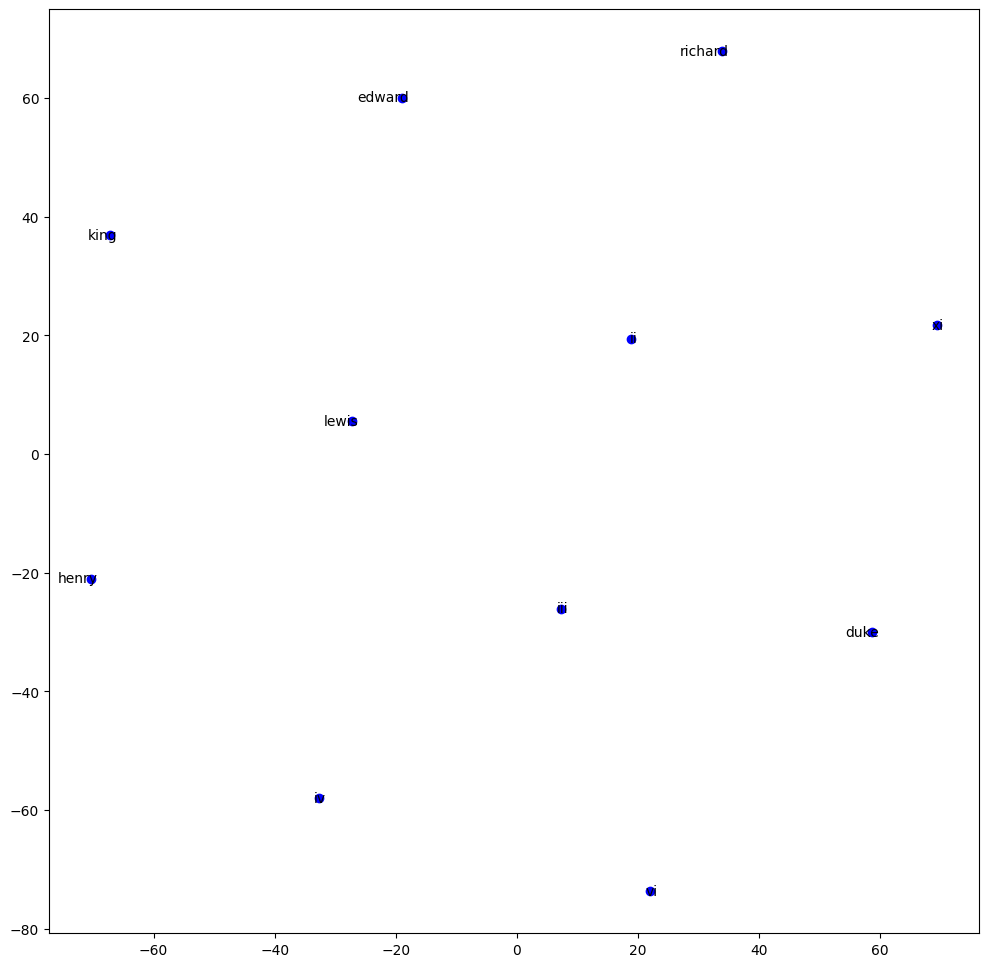

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_closest_words(model, input_word, topn=20):
    if input_word not in model.wv.key_to_index:
        print(f"The word '{input_word}' is not in the vocabulary.")
        return

    # Get the closest words specified by 'topn'
    closest_words = model.wv.most_similar(positive=[input_word], topn=topn)
    words = [word for word, _ in closest_words]
    words.append(input_word)  # Also include the input word

    # Extract the corresponding vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Use t-SNE to reduce dimensionality
    perplexity_value = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    Y = tsne.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(12, 12))
    plt.scatter(Y[:, 0], Y[:, 1], color='blue')

    for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, -5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.show()

# Example usage of the function
plot_closest_words(model, "king", topn=10)